In [2]:
from EnergyDisaggregation.energydisaggregation.dataloader.config import DATACONFIG, CONFIG_WEATHER, CONFIG_POWER
from EnergyDisaggregation.energydisaggregation.feature_engineering.utils import get_dataframe
import pandas as pd
import warnings
pd.options.plotting.backend = "plotly"
warnings.simplefilter(action='ignore', category=FutureWarning)

/home/dubois/Bureau/M2 DS/Capstone Project/EnergyDisaggregation/EnergyDisaggregation/energydisaggregation/dataloader/dataloader.py:15: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data[config["Date"]].str.replace("T", " ").str.replace("+", " +")
/home/dubois/Bureau/M2 DS/Capstone Project/EnergyDisaggregation/EnergyDisaggregation/energydisaggregation/dataloader/dataloader.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[config["Date"]] = pd.to_datetime(
/home/dubois/Bureau/M2 DS/Capstone Project/EnergyDisaggregation/EnergyDisaggregation/energydisaggregation/dataloader/dataloader.py:

In [3]:
df_process = pd.read_csv('EnergyDisaggregation/energydisaggregation/data_storage/df_process.csv')

In [33]:
df_process.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736128 entries, 0 to 736127
Data columns (total 32 columns):
 #   Column                                     Non-Null Count   Dtype  
---  ------                                     --------------   -----  
 0   Date - Heure                               736128 non-null  object 
 1   Région                                     736128 non-null  object 
 2   consommation brute électricité (mw) - rte  736128 non-null  float64
 3   température (°c)                           736128 non-null  float64
 4   nebulosité totale                          736128 non-null  float64
 5   vitesse du vent moyen 10 mn                736128 non-null  float64
 6   vitesse du vent en km/h                    736128 non-null  float64
 7   température ressentie                      736128 non-null  float64
 8   saison                                     736128 non-null  int64  
 9   is_holiday                                 736128 non-null  bool   
 10  is_bank_

In [34]:
df_process.head()

,Date - Heure,Région,consommation brute électricité (mw) - rte,température (°c),nebulosité totale,vitesse du vent moyen 10 mn,vitesse du vent en km/h,température ressentie,saison,is_holiday,...,month_cos,week_day_sin,week_day_cos,température (°c)_lag_1,température (°c)_lag_2,température (°c)_lag_3,température (°c)_lag_4,température (°c)_lag_5,température (°c)_lag_6,température (°c)_lag_7
0,2013-01-01 00:00:00+01:00,Auvergne-Rhône-Alpes,8173.0,9.375,50.00,10.275,36.99,5.309697,3,True,...,0.866025,0.781831,0.62349,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2013-01-01 00:00:00+01:00,Bourgogne-Franche-Comté,2357.0,2.675,98.75,1.825,6.57,0.849588,3,True,...,0.866025,0.781831,0.62349,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2013-01-01 00:00:00+01:00,Bretagne,3050.0,9.475,81.25,3.975,14.31,7.354916,3,True,...,0.866025,0.781831,0.62349,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2013-01-01 00:00:00+01:00,Centre-Val de Loire,2476.0,8.200,90.00,5.950,21.42,4.960144,3,True,...,0.866025,0.781831,0.62349,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2013-01-01 00:00:00+01:00,Grand Est,4943.0,5.075,100.00,5.550,19.98,1.164014,3,True,...,0.866025,0.781831,0.62349,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
subset = df_process[df_process['Région'] == 'Bretagne']

In [36]:
subset.head()

,Date - Heure,Région,consommation brute électricité (mw) - rte,température (°c),nebulosité totale,vitesse du vent moyen 10 mn,vitesse du vent en km/h,température ressentie,saison,is_holiday,...,month_cos,week_day_sin,week_day_cos,température (°c)_lag_1,température (°c)_lag_2,température (°c)_lag_3,température (°c)_lag_4,température (°c)_lag_5,température (°c)_lag_6,température (°c)_lag_7
2,2013-01-01 00:00:00+01:00,Bretagne,3050.0,9.475000,81.25,3.975000,14.31,7.354916,3,True,...,0.866025,0.781831,0.62349,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,2013-01-01 01:00:00+01:00,Bretagne,5601.0,8.983333,75.00,3.858333,13.89,6.807765,3,True,...,0.866025,0.781831,0.62349,-0.491667,NaN,NaN,NaN,NaN,NaN,NaN
26,2013-01-01 02:00:00+01:00,Bretagne,5730.0,8.916667,75.00,4.891667,17.61,6.264181,3,True,...,0.866025,0.781831,0.62349,-0.066667,-0.558333,NaN,NaN,NaN,NaN,NaN
38,2013-01-01 03:00:00+01:00,Bretagne,5172.0,8.850000,75.00,5.925000,21.33,5.793575,3,True,...,0.866025,0.781831,0.62349,-0.066667,-0.133333,-0.625000,NaN,NaN,NaN,NaN
50,2013-01-01 04:00:00+01:00,Bretagne,4742.0,8.650000,73.75,6.483333,23.34,5.351850,3,True,...,0.866025,0.781831,0.62349,-0.200000,-0.266667,-0.333333,-0.825,NaN,NaN,NaN


In [39]:
df_region = subset

In [43]:
df_region = df_region.bfill().ffill()

In [79]:
list_temp = ['température (°c)', 'température ressentie.1', 'température (°c)_mean_48', 'température (°c)_min_48', 'température (°c)_std_48', 'température (°c)_max_48', 'température (°c)_lag_1', 'température (°c)_lag_2', 'température (°c)_lag_3', 'température (°c)_lag_4', 'température (°c)_lag_5', 'température (°c)_lag_6', 'température (°c)_lag_7']
list_calendar = ['saison', 'week_day_sin', 'week_day_cos', 'month_sin', 'month_cos', 'is_holiday', 'is_bank_holiday']

In [66]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader

In [67]:
class FeaturesDataset(Dataset):
    """Calendar and Temperatures features dataset."""

    def __init__(self, df, list_temp, list_calendar):
        self.df = df
        self.temp = list_temp
        self.calendar = list_calendar

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()
        calendar_features = self.df.iloc[idx, self.df.columns.isin(self.calendar)].tolist()
        temperature_features = self.df.iloc[idx, self.df.columns.isin(self.temp)].tolist()
        target = self.df.iloc[idx]['consommation brute électricité (mw) - rte']
        
        sample = {'temp': torch.tensor(temperature_features), 'calendar': torch.tensor(calendar_features), 'target': torch.tensor(target)}

        return sample

In [68]:
df_region['datetime_obj'] = pd.to_datetime(df_region['Date - Heure'])

In [69]:
df_region.head()

,Date - Heure,Région,consommation brute électricité (mw) - rte,température (°c),nebulosité totale,vitesse du vent moyen 10 mn,vitesse du vent en km/h,température ressentie,saison,is_holiday,...,week_day_sin,week_day_cos,température (°c)_lag_1,température (°c)_lag_2,température (°c)_lag_3,température (°c)_lag_4,température (°c)_lag_5,température (°c)_lag_6,température (°c)_lag_7,datetime_obj
2,2013-01-01 00:00:00+01:00,Bretagne,3050.0,9.475000,81.25,3.975000,14.31,7.354916,3,True,...,0.781831,0.62349,-0.491667,-0.558333,-0.625000,-0.825,-1.425,-2.025,-2.325,2013-01-01 00:00:00+01:00
14,2013-01-01 01:00:00+01:00,Bretagne,5601.0,8.983333,75.00,3.858333,13.89,6.807765,3,True,...,0.781831,0.62349,-0.491667,-0.558333,-0.625000,-0.825,-1.425,-2.025,-2.325,2013-01-01 01:00:00+01:00
26,2013-01-01 02:00:00+01:00,Bretagne,5730.0,8.916667,75.00,4.891667,17.61,6.264181,3,True,...,0.781831,0.62349,-0.066667,-0.558333,-0.625000,-0.825,-1.425,-2.025,-2.325,2013-01-01 02:00:00+01:00
38,2013-01-01 03:00:00+01:00,Bretagne,5172.0,8.850000,75.00,5.925000,21.33,5.793575,3,True,...,0.781831,0.62349,-0.066667,-0.133333,-0.625000,-0.825,-1.425,-2.025,-2.325,2013-01-01 03:00:00+01:00
50,2013-01-01 04:00:00+01:00,Bretagne,4742.0,8.650000,73.75,6.483333,23.34,5.351850,3,True,...,0.781831,0.62349,-0.200000,-0.266667,-0.333333,-0.825,-1.425,-2.025,-2.325,2013-01-01 04:00:00+01:00


In [70]:
filtered_df = df_region[df_region['datetime_obj'].dt.year <= 2018]

In [71]:
test_df = df_region[df_region['datetime_obj'].dt.year == 2019]

In [72]:
filtered_df.head()

,Date - Heure,Région,consommation brute électricité (mw) - rte,température (°c),nebulosité totale,vitesse du vent moyen 10 mn,vitesse du vent en km/h,température ressentie,saison,is_holiday,...,week_day_sin,week_day_cos,température (°c)_lag_1,température (°c)_lag_2,température (°c)_lag_3,température (°c)_lag_4,température (°c)_lag_5,température (°c)_lag_6,température (°c)_lag_7,datetime_obj
2,2013-01-01 00:00:00+01:00,Bretagne,3050.0,9.475000,81.25,3.975000,14.31,7.354916,3,True,...,0.781831,0.62349,-0.491667,-0.558333,-0.625000,-0.825,-1.425,-2.025,-2.325,2013-01-01 00:00:00+01:00
14,2013-01-01 01:00:00+01:00,Bretagne,5601.0,8.983333,75.00,3.858333,13.89,6.807765,3,True,...,0.781831,0.62349,-0.491667,-0.558333,-0.625000,-0.825,-1.425,-2.025,-2.325,2013-01-01 01:00:00+01:00
26,2013-01-01 02:00:00+01:00,Bretagne,5730.0,8.916667,75.00,4.891667,17.61,6.264181,3,True,...,0.781831,0.62349,-0.066667,-0.558333,-0.625000,-0.825,-1.425,-2.025,-2.325,2013-01-01 02:00:00+01:00
38,2013-01-01 03:00:00+01:00,Bretagne,5172.0,8.850000,75.00,5.925000,21.33,5.793575,3,True,...,0.781831,0.62349,-0.066667,-0.133333,-0.625000,-0.825,-1.425,-2.025,-2.325,2013-01-01 03:00:00+01:00
50,2013-01-01 04:00:00+01:00,Bretagne,4742.0,8.650000,73.75,6.483333,23.34,5.351850,3,True,...,0.781831,0.62349,-0.200000,-0.266667,-0.333333,-0.825,-1.425,-2.025,-2.325,2013-01-01 04:00:00+01:00


In [73]:
test_df.head()

,Date - Heure,Région,consommation brute électricité (mw) - rte,température (°c),nebulosité totale,vitesse du vent moyen 10 mn,vitesse du vent en km/h,température ressentie,saison,is_holiday,...,week_day_sin,week_day_cos,température (°c)_lag_1,température (°c)_lag_2,température (°c)_lag_3,température (°c)_lag_4,température (°c)_lag_5,température (°c)_lag_6,température (°c)_lag_7,datetime_obj
631010,2019-01-01 00:00:00+01:00,Bretagne,6557.0,8.200000,100.0,1.525,5.49,7.554806,3,True,...,0.781831,0.62349,-0.133333,-0.266667,-0.375000,-0.475000,-0.575000,-0.625000,-0.658333,2019-01-01 00:00:00+01:00
631022,2019-01-01 01:00:00+01:00,Bretagne,5883.0,8.208333,100.0,1.575,5.67,7.509172,3,True,...,0.781831,0.62349,0.008333,-0.125000,-0.258333,-0.366667,-0.466667,-0.566667,-0.616667,2019-01-01 01:00:00+01:00
631034,2019-01-01 02:00:00+01:00,Bretagne,5785.0,8.641667,100.0,1.475,5.31,8.114763,3,True,...,0.781831,0.62349,0.433333,0.441667,0.308333,0.175000,0.066667,-0.033333,-0.133333,2019-01-01 02:00:00+01:00
631046,2019-01-01 03:00:00+01:00,Bretagne,5117.0,9.075000,100.0,1.375,4.95,8.721901,3,True,...,0.781831,0.62349,0.433333,0.866667,0.875000,0.741667,0.608333,0.500000,0.400000,2019-01-01 03:00:00+01:00
631058,2019-01-01 04:00:00+01:00,Bretagne,4782.0,9.300000,100.0,1.500,5.40,8.837855,3,True,...,0.781831,0.62349,0.225000,0.658333,1.091667,1.100000,0.966667,0.833333,0.725000,2019-01-01 04:00:00+01:00


In [74]:
filtered_df = filtered_df.reset_index()

In [75]:
test_df = test_df.reset_index()

In [80]:
features = FeaturesDataset(filtered_df, list_temp, list_calendar)

In [81]:
features_test = FeaturesDataset(test_df, list_temp, list_calendar)

In [82]:
for i in range(3):
    sample = features[i]
    print(i, sample['temp'], sample['calendar'], sample['target'])

0 tensor([ 9.4750,  7.3549, -0.5661,  1.7740,  9.4750, -3.6917, -0.4917, -0.5583,
        -0.6250, -0.8250, -1.4250, -2.0250, -2.3250], dtype=torch.float64) tensor([3.0000, 1.0000, 1.0000, 0.5000, 0.8660, 0.7818, 0.6235],
       dtype=torch.float64) tensor(3050., dtype=torch.float64)
1 tensor([ 8.9833,  6.8078, -0.3340,  2.2312,  9.4750, -3.6917, -0.4917, -0.5583,
        -0.6250, -0.8250, -1.4250, -2.0250, -2.3250], dtype=torch.float64) tensor([3.0000, 1.0000, 1.0000, 0.5000, 0.8660, 0.7818, 0.6235],
       dtype=torch.float64) tensor(5601., dtype=torch.float64)
2 tensor([ 8.9167,  6.2642, -0.0901,  2.5709,  9.4750, -3.6917, -0.0667, -0.5583,
        -0.6250, -0.8250, -1.4250, -2.0250, -2.3250], dtype=torch.float64) tensor([3.0000, 1.0000, 1.0000, 0.5000, 0.8660, 0.7818, 0.6235],
       dtype=torch.float64) tensor(5730., dtype=torch.float64)


In [83]:
train_loader = DataLoader(features, batch_size = 25, shuffle=True, num_workers=0)

In [84]:
import torch
import torch.nn.functional as F
from torch.nn import Linear

In [85]:
class NN(torch.nn.Module):
    def __init__(self, temp_dim, calendar_dim, hidden_dim, output_dim, num_layers):
      
      super(NN, self).__init__()

      # A list of layers for the temperature model
      self.temp = None

      # A list of layers for the calendar model
      self.calendar = None

      self.temp = torch.nn.ModuleList([Linear(temp_dim, hidden_dim)] + [Linear(hidden_dim, hidden_dim) for i in range(num_layers - 2)] + [Linear(hidden_dim, output_dim)])
      self.calendar = torch.nn.ModuleList([Linear(calendar_dim, hidden_dim)] + [Linear(hidden_dim, hidden_dim) for i in range(num_layers - 2)] + [Linear(hidden_dim, output_dim)])


    def reset_parameters(self):
      for layer in self.temp:
          layer.reset_parameters()
      for layer in self.calendar:
          layer.reset_parameters()

    def forward(self, x_temp, x_calendar):
      x = None

      for i in range(len(self.temp)):
        x_temp = self.temp[i](x_temp)
        x_temp = F.relu(x_temp)
        x_calendar = self.calendar[i](x_calendar)
        x_calendar = F.relu(x_calendar)
      x = x_temp + x_calendar  
      return x, x_temp, x_calendar

In [86]:
temp_dim = len(list_temp)
calendar_dim = len(list_calendar)
hidden_dim = 25
output_dim = 1
num_layers = 5

In [87]:
model = NN(temp_dim, calendar_dim, hidden_dim, output_dim, num_layers)

In [88]:
EPOCHS = 300
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
loss_function = torch.nn.MSELoss()

In [89]:
# Run the training loop
for epoch in range(0, EPOCHS): 
  
  # Print epoch
  print(f'Starting epoch {epoch+1}')
  
  # Set current loss value
  current_loss = 0.0
  
  # Iterate over the DataLoader for training data
  for i, data in enumerate(train_loader, 0):
    
    # Get and prepare inputs
    inputs_temp = data['temp'].float()
    inputs_calendar = data['calendar'].float()
    targets = data['target'].float()
    
    targets = targets.reshape((targets.shape[0], 1))
    
    # Zero the gradients
    optimizer.zero_grad()
    
    # Perform forward pass
    out, out_temp, out_calendar = model(inputs_temp, inputs_calendar)
    
    # Compute loss
    loss = loss_function(out, targets)
    
    # Perform backward pass
    loss.backward()
    
    # Perform optimization
    optimizer.step()
    
    # Print statistics
    current_loss += loss.item()
    if i % 10 == 0:
        print('Loss after mini-batch %5d: %.3f' %
              (i + 1, current_loss / 500))
        current_loss = 0.0

# Process is complete.
print('Training process has finished.')

Starting epoch 1
Loss after mini-batch     1: 63707.544
Loss after mini-batch    11: 538020.124
Loss after mini-batch    21: 526590.308
Loss after mini-batch    31: 560143.360
Loss after mini-batch    41: 552738.960
Loss after mini-batch    51: 575260.436
Loss after mini-batch    61: 526073.176
Loss after mini-batch    71: 543502.636
Loss after mini-batch    81: 515308.760
Loss after mini-batch    91: 518139.964
Loss after mini-batch   101: 535082.656
Loss after mini-batch   111: 449717.764
Loss after mini-batch   121: 352791.126
Loss after mini-batch   131: 288654.122
Loss after mini-batch   141: 234326.606
Loss after mini-batch   151: 139818.037
Loss after mini-batch   161: 145599.992
Loss after mini-batch   171: 141963.051
Loss after mini-batch   181: 139877.484
Loss after mini-batch   191: 113588.765
Loss after mini-batch   201: 124669.211
Loss after mini-batch   211: 103088.880
Loss after mini-batch   221: 95365.635
Loss after mini-batch   231: 73536.686
Loss after mini-batch   24

In [ ]:
predicted_conso = []
conso_temp = []
conso_calendar = []
true_conso = []
for i in range(len(features_test)):
    data = features[i]
    inputs_temp = data['temp'].float()
    inputs_calendar = data['calendar'].float()
    targets = data['target'].float()

    model.eval()
    # Make the prediction
    with torch.no_grad():
        out, out_temp, out_calendar = model(inputs_temp, inputs_calendar)
    predicted_value = out.item()
    predicted_value_temp = out_temp.item()
    predicted_value_calendar = out_calendar.item()

    predicted_conso.append(predicted_value)
    conso_temp.append(predicted_value_temp)
    conso_calendar.append(predicted_value_calendar)
    true_conso.append(targets.numpy())

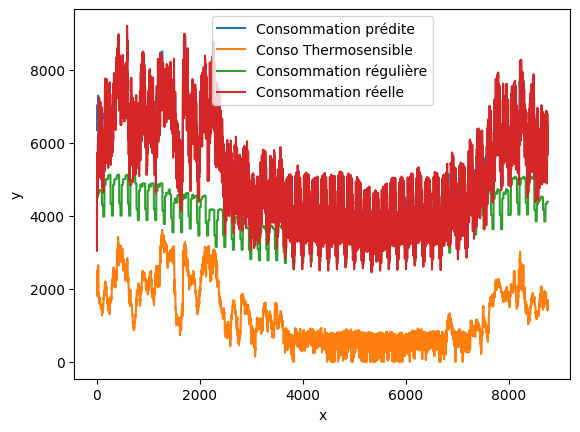

In [ ]:
plt.plot(predicted_conso, label='Consommation prédite')
plt.plot(conso_temp, label='Conso Thermosensible')
plt.plot(conso_calendar, label='Consommation régulière')
plt.plot(true_conso, label='Consommation réelle')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()